In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
#read CSV
reg_2016 = pd.read_csv ('data/2016 Vehicle Registration.csv',header=[1])
reg_2017 = pd.read_csv ('data/2017 Vehicle Registration.csv',header=[1]) #header = [1] to skip the first row
reg_2018 = pd.read_csv ('data/2018 Vehicle Registration.csv',header=[1])
reg_2019 = pd.read_csv ('data/2019 Vehicle Registration.csv',header=[1])
reg_2020 = pd.read_csv ('data/2020 Vehicle Registration.csv',header=[1])
reg_2021 = pd.read_csv ('data/2021 Vehicle Registration.csv',header=[1])
ev_model = pd.read_csv ('data/US EV model offered by year.csv')

In [3]:
#remove comma to convert string to int
reg_2016.replace(',','', regex=True, inplace=True)
reg_2017.replace(',','', regex=True, inplace=True)
reg_2018.replace(',','', regex=True, inplace=True)
reg_2019.replace(',','', regex=True, inplace=True)
reg_2020.replace(',','', regex=True, inplace=True)
reg_2021.replace(',','', regex=True, inplace=True)


In [4]:
#clean 2016 vehicle registration and create a 2016 vehicle dataframe
reg_2016['Electric (EV)'] = reg_2016['Electric (EV)'].astype(int)
reg_2016_final = reg_2016.set_index('State') #turn State to index
cars_2016 = reg_2016_final.loc['United States',:] #choose only Texas
cars_2016df = cars_2016.to_frame() #convert series to dataframe
cars_2016_rename =cars_2016df.rename(columns={"United States":'2016'}).reset_index(level=0) #rename Texas to Year to merge later and reset index for merge


In [5]:
#clean 2017 vehicle registration and create a 2017 vehicle dataframe
reg_2017['Electric (EV)'] = reg_2017['Electric (EV)'].astype(int)
reg_2017_final = reg_2017.set_index('State') #turn State to index
cars_2017 = reg_2017_final.loc['United States',:] #choose only Texas
cars_2017df = cars_2017.to_frame() #convert series to dataframe
cars_2017_rename =cars_2017df.rename(columns={"United States":'2017'}).reset_index(level=0) #rename Texas to Year to merge later and reset index for merge


In [6]:
#clean 2018 vehicle registration and create a 2018 vehicle dataframe
reg_2018['Electric (EV)'] = reg_2018['Electric (EV)'].astype(int)
reg_2018_final = reg_2018.set_index('State') #turn State to index
cars_2018 = reg_2018_final.loc['United States',:] #choose only Texas
cars_2018df = cars_2018.to_frame() #convert series to dataframe
cars_2018_rename =cars_2018df.rename(columns={"United States":'2018'}).reset_index(level=0) #rename Texas to Year to merge later and reset index for merge


In [11]:
#clean 2019 vehicle registration and create a 2019 vehicle dataframe
reg_2019['Electric (EV)'] = reg_2019['Electric (EV)'].astype(int)
reg_2019_final = reg_2019.set_index('State') #turn State to index
cars_2019 = reg_2019_final.loc['United States',:] #choose only Texas
cars_2019df = cars_2019.to_frame() #convert series to dataframe
cars_2019_rename = cars_2019df.rename(columns={"United States":'2019'}).reset_index(level=0) #rename Texas to Year to merge later and reset index for merge #rename Texas to Year to merge later


In [12]:
#clean 2020 vehicle registration and create a 2020 vehicle dataframe
reg_2020['Electric (EV)'] = reg_2020['Electric (EV)'].astype(int)
reg_2020_final = reg_2020.set_index('State') #turn State to index
cars_2020 = reg_2020_final.loc['United States',:] #choose only Texas
cars_2020df = cars_2020.to_frame() #convert series to dataframe
cars_2020_rename = cars_2020df.rename(columns={"United States":'2020'}).reset_index(level=0) #rename Texas to Year to merge later and reset index for merge #rename Texas to Year to merge later

In [13]:
#clean 2021 vehicle registration and create a 2021 vehicle dataframe
reg_2021['Electric (EV)'] = reg_2021['Electric (EV)'].astype(int)
reg_2021_final = reg_2021.set_index('State') #turn State to index
cars_2021 = reg_2021_final.loc['United States',:] #choose only Texas
cars_2021df = cars_2021.to_frame() #convert series to dataframe
cars_2021_rename = cars_2021df.rename(columns={"United States":'2021'}).reset_index(level=0) #rename Texas to Year to merge later and reset index for merge #rename Texas to Year to merge later


In [21]:
cars_reg_2016_2017 = pd.merge(cars_2016_rename,cars_2017_rename) #merge dataframe
cars_reg_2018_2019 = pd.merge(cars_2018_rename,cars_2019_rename)
cars_reg_2020_2021 = pd.merge(cars_2020_rename,cars_2021_rename)
cars_reg_by_year = pd.merge(cars_reg_2018_2019,cars_reg_2020_2021)
cars_reg_by_year = pd.merge(cars_reg_by_year,cars_reg_2016_2017)
cars_reg_by_year = cars_reg_by_year.rename(columns={'index':'Type'})
cars_reg_by_year = cars_reg_by_year[['Type','2016','2017','2018','2019','2020','2021']] #reorganize columns
cars_reg_by_year_graph = cars_reg_by_year.set_index('Type')
graph_key = cars_reg_by_year_graph.keys() #key for graph
#use for first visualization 
cars_reg_by_year_graph['2016']=cars_reg_by_year_graph['2016'].astype(int)
cars_reg_by_year_graph['2017']=cars_reg_by_year_graph['2017'].astype(int)
cars_reg_by_year_graph['2018']=cars_reg_by_year_graph['2018'].astype(int)
cars_reg_by_year_graph['2019']=cars_reg_by_year_graph['2019'].astype(int)
cars_reg_by_year_graph['2020']=cars_reg_by_year_graph['2020'].astype(int)
cars_reg_by_year_graph['2021']=cars_reg_by_year_graph['2021'].astype(int)
cars_reg_by_year_graph




,2016,2017,2018,2019,2020,2021
Type,,,,,,
Electric (EV),280300,377100,572600,783600,1018900,1454400
Plug-In Hybrid Electric (PHEV),254000,344600,461300,536600,594400,786800
Hybrid Electric (HEV),3741600,4036000,4242400,4512900,4813700,5491800
Biodiesel,0,0,0,0,0,2194100
Ethanol/Flex (E85),22138300,24607700,26288400,27540700,27997200,21244900
Compressed Natural Gas (CNG),721600,663100,609200,560700,521600,40800
Propane,0,0,0,0,0,7600
Hydrogen,1300,3200,9400,12800,14200,11800
Methanol,500,500,300,300,300,0


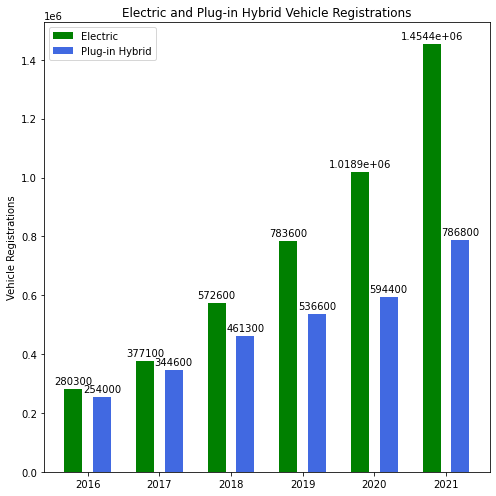

In [24]:
#graph second visualization
Electric1 = cars_reg_by_year_graph.loc['Electric (EV)',:]
Plugin1 = cars_reg_by_year_graph.loc['Plug-In Hybrid Electric (PHEV)',:]
x = np.arange(len(graph_key))  # the label locations
width = 0.25 # the width of the bars
fig, ax = plt.subplots()
bar1 = ax.bar(x - width/1.25, Electric1, width, label='Electric',color ='green')
bar2 = ax.bar(x + width/1.25, Plugin1, width, label='Plug-in Hybrid',color = 'royalblue')
ax.set_ylabel('Vehicle Registrations')
ax.set_title('Electric and Plug-in Hybrid Vehicle Registrations')
ax.set_xticks(x, graph_key)
ax.legend()
ax.bar_label(bar1, padding=3)
ax.bar_label(bar2, padding=3)
fig.tight_layout()
plt.rcParams['figure.figsize']=(7,7) # Change plot size:
plt.savefig('output/Electric and Plug-in Hybrid Vehicle Registrations.jpeg')
plt.show()



In [18]:
EV_Gasoline = cars_reg_by_year.loc[[0,1,9],:]
EV_Gasoline  = EV_Gasoline.set_index('Type')
EV_Gasoline['2016'] = EV_Gasoline['2016'].astype(int)
EV_Gasoline['2017'] = EV_Gasoline['2017'].astype(int)
EV_Gasoline['2018'] = EV_Gasoline['2018'].astype(int)
EV_Gasoline['2019'] = EV_Gasoline['2019'].astype(int)
EV_Gasoline['2020'] = EV_Gasoline['2020'].astype(int)
EV_Gasoline['2021'] = EV_Gasoline['2021'].astype(int)
#EV_Gasoline.info()
EV_Gasoline['2017 Percentage'] =round((((EV_Gasoline['2017']-EV_Gasoline['2016'])/EV_Gasoline['2016'])*100).astype(float),1)
EV_Gasoline['2018 Percentage'] =round((((EV_Gasoline['2018']-EV_Gasoline['2017'])/EV_Gasoline['2017'])*100).astype(float),1)
EV_Gasoline['2019 Percentage'] =round((((EV_Gasoline['2019']-EV_Gasoline['2018'])/EV_Gasoline['2018'])*100).astype(float),1)
EV_Gasoline['2020 Percentage'] =round((((EV_Gasoline['2020']-EV_Gasoline['2019'])/EV_Gasoline['2019'])*100).astype(float),1)
EV_Gasoline['2021 Percentage'] =round((((EV_Gasoline['2021']-EV_Gasoline['2020'])/EV_Gasoline['2020'])*100).astype(float),1)
EV_Gasoline_graph = EV_Gasoline[['2017 Percentage','2018 Percentage','2019 Percentage','2020 Percentage','2021 Percentage']]
#use for second visualization 
second_label = EV_Gasoline_graph.keys()
second_label

Index(['2017 Percentage', '2018 Percentage', '2019 Percentage',
       '2020 Percentage', '2021 Percentage'],
      dtype='object')

In [19]:
EV_Gasoline_graph

,2017 Percentage,2018 Percentage,2019 Percentage,2020 Percentage,2021 Percentage
Type,,,,,
Electric (EV),34.5,51.8,36.8,30.0,42.7
Plug-In Hybrid Electric (PHEV),35.7,33.9,16.3,10.8,32.4
Gasoline,1.1,0.7,1.0,0.3,3.8


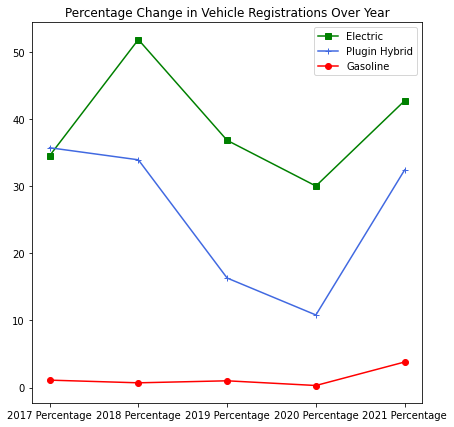

In [20]:
x_axis = second_label
Electric = EV_Gasoline_graph.loc['Electric (EV)',:]
Plugin=EV_Gasoline_graph.loc['Plug-In Hybrid Electric (PHEV)',:]
Gasoline=EV_Gasoline_graph.loc['Gasoline',:]
plt.plot(x_axis,Electric,label ="Electric", marker = "s",color='green')
plt.plot(x_axis,Plugin,label = "Plugin Hybrid", marker ="+",color='royalblue')
plt.plot(x_axis,Gasoline,label = "Gasoline", marker ="o",color='red')

plt.legend() #for label to show
plt.title('Percentage Change in Vehicle Registrations Over Year')
plt.savefig('output/Percentage Change in Vehicle Registrations Over Year.jpeg')
plt.show()

In [24]:
ev_model = ev_model.fillna(0) #fill N/A with value 0 
ev_model_by_year = ev_model[['Manufacturer','2016','2017','2018','2019','2020','2021']].set_index('Manufacturer') #only choose the year that we are intrested in 
ev_model_offered_by_year =ev_model_by_year.loc['Total',:].reset_index(level=0).rename(columns={'index':'Year'})
ev_model_offered_by_year

#use for third visualization 

,Year,Total
0,2016,155
1,2017,183.0
2,2018,203.0
3,2019,220.0
4,2020,227.0
5,2021,261.0


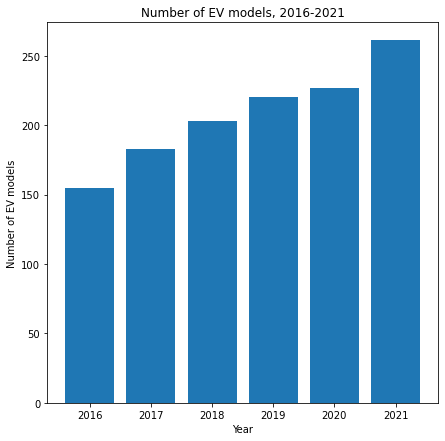

In [43]:
x_axis = ev_model_offered_by_year['Year'].astype(int)
y_axis = ev_model_offered_by_year['Total'].astype(int)

#plt.figure(figsize=(6,9))
plt.bar(x_axis,y_axis)
plt.xlabel("Year")
plt.ylabel('Number of EV models')
plt.title('Number of EV models, 2016-2021')
plt.rcParams['figure.figsize']=(9,8) # Change plot size:
plt.savefig('output/Number of EV models, 2016-2021.jpeg')
plt.show()
